## 데이터톤 - 쌍쌍봐

### 서울 스타벅스 매장 입지조건 분석

In [67]:
#사용 라이브러리 불러오기

import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 우편번호정보 가져오기

##### -- 최초 도로명을 기준으로 분류하였으나 Dataframe간 Merge시 누락되는 도로명이 많아 우편번호로 변경하여 처리하게 됨.

In [66]:
post_no = pd.read_csv('./rnaddrkor_seoul_post.csv', encoding="cp949")
post_no.to_csv('우편번호.csv', encoding="cp949")
post_no

,도로명,우편번호
0,자하문로,3047.0
1,자하문로,3032.0
2,자하문로,3031.0
3,자하문로,3046.0
4,창의문로,3047.0
...,...,...
30342,가래여울1길,5200.0
30343,아리수로93다길,5414.0
30344,아리수로93나길,5414.0
30345,아리수로93나길,5415.0


#### 서울시상권데이터 분석 ( 서울특별시 상권분석 정보 )

In [254]:
#서울시 소상공인상권분석정보 불러오기
seoul_all_store = pd.read_csv('./3_seoul_store.csv', encoding="cp949")
seoul_all_store.head()
#seoul_all_store.columns

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1.156010e+24,NaN,"서울특별시 영등포구 영중로14길 11-17, (영등포동5가)",150030,7250,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1.120010e+24,NaN,"서울특별시 성동구 용답5길 2, (용답동)",133849,4803,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1.111020e+24,금사랑투빌딩,"서울특별시 종로구 서순라길 17-10, (봉익동)",110390,3138,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1.171010e+24,NaN,"서울특별시 송파구 위례성대로12길 31, (방이동)",138834,5640,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1.165010e+24,상랑의빌딩,"서울특별시 서초구 동광로18길 82, (방배동)",137837,6572,NaN,1,NaN,126.991394,37.488375


In [295]:
#대분류코드 기준 업종별 현황 확인 해보기
seoul_all_store["abbr"] = seoul_all_store["도로명"].str.split()
seoul_all_store["abbr_last"] = pd.DataFrame(s1[2] for s1 in seoul_all_store["abbr"])
seoul_all_stats1 = seoul_all_store.groupby(["상권업종대분류명"]).count()
seoul_all_stats1 = pd.DataFrame(seoul_all_stats1)
#seoul_all_stats1
seoul_all_stats2 = seoul_all_store[seoul_all_store['상권업종소분류코드'] == "Q12A01" ]
seoul_all_stats3 = seoul_all_stats2.groupby(["신우편번호","상권업종대분류코드", "상권업종대분류명"]).count()
#seoul_all_stats3.to_csv('서울특별시음식업종도로명주소별건수.csv', encoding="cp949")
seoul_all_stats4 = seoul_all_store[seoul_all_store['상권업종소분류코드'] == "Q12A01"]
seoul_all_stats4 = seoul_all_stats4["신우편번호"].value_counts().sort_values(ascending=False).head(10)
seoul_all_stats5 = pd.DataFrame(seoul_all_store.groupby(["신우편번호"])["상호명"].count().sort_values(ascending=False).head(10))
#seoul_all_stats5 = seoul_all_stats4.sort_values("상권업종소분류명", ascending=False).groupby('신우편번호', sort=False).head(3)
seoul_all_stats5.rename(columns={'상호명':'count'}, inplace=True)
seoul_all_stats4.info()
sr = pd.Series(data=seoul_all_stats4, index=seoul_all_stats4.index)

<class 'pandas.core.series.Series'>
Int64Index: 10 entries, 6164 to 3980
Series name: 신우편번호
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 160.0 bytes


C:\Users\user\AppData\Local\Temp\ipykernel_16396\55346700.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[1,0], x=sr.values)


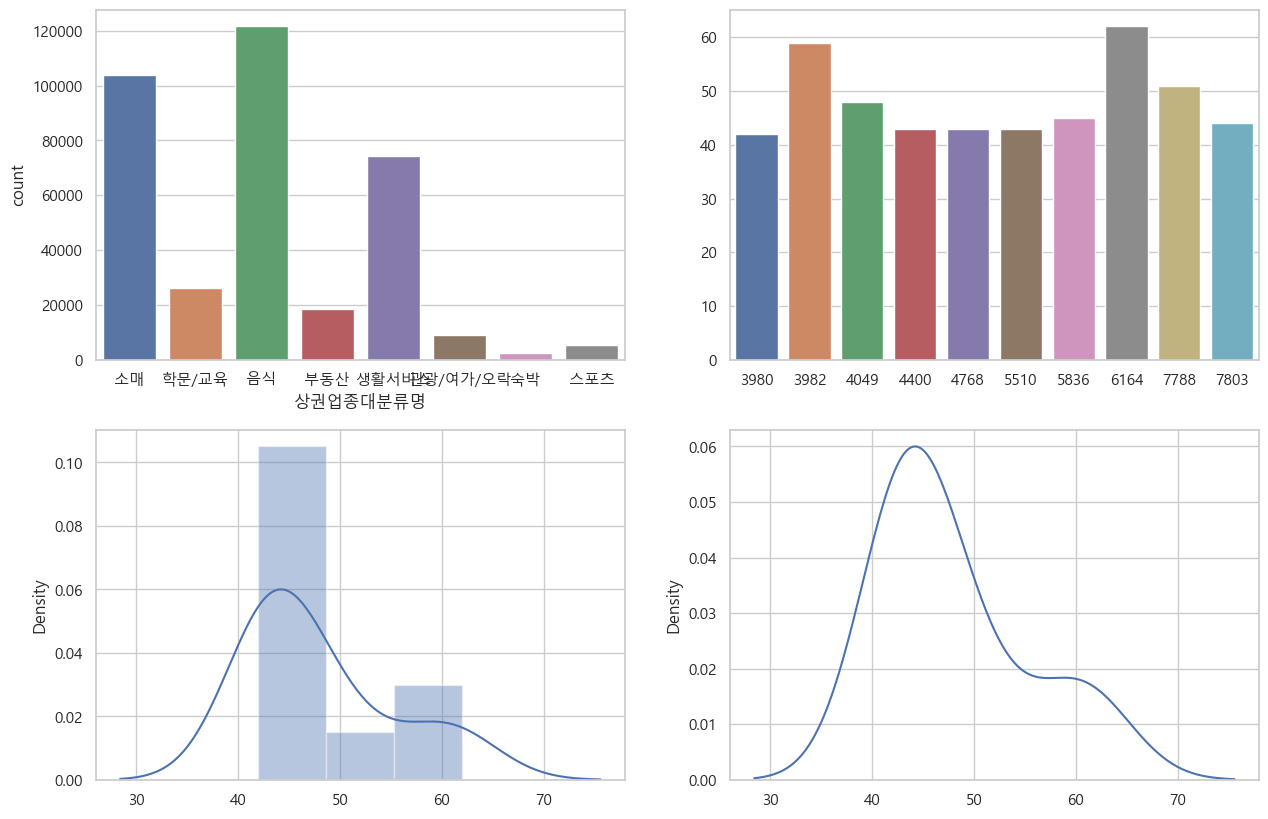

In [296]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(ax=axes[0,0], x=seoul_all_store["상권업종대분류명"], data=seoul_all_store,)
sns.barplot(ax=axes[0,1], x=sr.index, y=sr.values, )
sns.distplot(ax=axes[1,0], x=sr.values)
sns.kdeplot(data=sr, x=sr.values)
plt.show()

#### 카페데이터

#### 데이터분석( 마을상권 데이터 )

##### 데이터 불러오기

In [48]:
maul_data = pd.read_csv('./1_maul.csv',encoding = "cp949")
maul_data

,기준 년 코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액
0,2021,1,A,골목상권,1000193,왕산로43길,2729716,6,7501923026,2151712515,888933146,553108402,1067767035,1166698759,261418507,233074790,865027157,314182715
1,2021,1,A,골목상권,1000298,정릉로27길,3355209,7,11842475922,3099929654,1428912815,849935987,1555173516,1968536418,440069908,348552899,1651824332,499540393
2,2021,1,A,골목상권,1000297,정릉로26길,3338064,7,6179246740,1683952466,733874296,430168476,826003935,976992453,213755800,182240005,871685006,260574303
3,2021,1,A,골목상권,1000296,장위로50길,2416795,5,5235197988,1501033989,616414129,374450525,756011966,807825584,183610620,160542222,621093249,214215704
4,2021,1,A,골목상권,1000295,장월로1길,2956757,6,4803914725,1364476852,574723444,344562961,659910597,734715693,163371736,152451762,605566880,204134800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31305,2014,4,A,골목상권,1000409,연서로3길,3264390,7,8546298637,2439652577,1002395099,584239240,1203065420,1316966726,293333144,264123690,1096819048,345703693
31306,2014,4,A,골목상권,1000906,도산대로23길,3939775,8,4496832642,1076732844,567240740,350469569,492184064,776273341,188154328,141340874,705249550,199187332
31307,2014,4,A,골목상권,1000834,청룡길,3360742,7,10158457675,2765644178,1276965216,799794843,1299200845,1654492759,374670615,353761055,1171833190,462094974
31308,2014,4,A,골목상권,1000149,뚝섬로64길,4400547,8,4657927570,1210580144,583354177,359064090,599274860,801350131,190114858,144997399,564568661,204623250


In [49]:
#마을 상권 정보를 도로명으로 groupby 하여 merge위한 데이터로 만듬
maul_data_postno = pd.merge( left=maul_data, right=post_no, how="inner", left_on="상권_코드_명", right_on="도로명");
maul_data_postno
maul_data_mean = maul_data_postno.groupby(['우편번호']).mean()
maul_data_mean.to_csv('도로명기준마을상권정보.csv', encoding="cp949")
maul_data_mean

C:\Users\user\AppData\Local\Temp\ipykernel_16396\3747898889.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  maul_data_mean = maul_data_postno.groupby(['우편번호']).mean()


,기준 년 코드,기준_분기_코드,상권_코드,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액
우편번호,,,,,,,,,,,,,,,
1014.0,2017.612903,2.548387,1000345.0,2.790837e+06,6.000000,6.529484e+09,1.741727e+09,7.841659e+08,4.693332e+08,8.922261e+08,1.093007e+09,2.365440e+08,1.925671e+08,8.441163e+08,2.757976e+08
1015.0,2017.612903,2.548387,1000345.0,2.790837e+06,6.000000,6.529484e+09,1.741727e+09,7.841659e+08,4.693332e+08,8.922261e+08,1.093007e+09,2.365440e+08,1.925671e+08,8.441163e+08,2.757976e+08
1016.0,2017.612903,2.548387,1000345.0,2.790837e+06,6.000000,6.529484e+09,1.741727e+09,7.841659e+08,4.693332e+08,8.922261e+08,1.093007e+09,2.365440e+08,1.925671e+08,8.441163e+08,2.757976e+08
1020.0,2017.612903,2.548387,1000345.0,2.790837e+06,6.000000,6.529484e+09,1.741727e+09,7.841659e+08,4.693332e+08,8.922261e+08,1.093007e+09,2.365440e+08,1.925671e+08,8.441163e+08,2.757976e+08
1030.0,2017.612903,2.548387,1000344.0,2.930959e+06,6.225806,9.308738e+09,2.488517e+09,1.115871e+09,6.677761e+08,1.271287e+09,1.551968e+09,3.365593e+08,2.755460e+08,1.209982e+09,3.912325e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8855.0,2017.612903,2.548387,1000790.0,2.956846e+06,6.225806,7.303382e+09,2.073830e+09,8.559581e+08,5.034123e+08,1.030180e+09,1.128505e+09,2.466480e+08,2.258484e+08,9.434334e+08,2.955667e+08
8856.0,2017.612903,2.548387,1000789.5,2.942767e+06,6.225806,6.760875e+09,1.931973e+09,7.907044e+08,4.658840e+08,9.600414e+08,1.037397e+09,2.279752e+08,2.096874e+08,8.648925e+08,2.723198e+08
8857.0,2017.612903,2.548387,1000789.0,2.928689e+06,6.225806,6.218369e+09,1.790116e+09,7.254508e+08,4.283557e+08,8.899029e+08,9.462899e+08,2.093024e+08,1.935264e+08,7.863516e+08,2.490728e+08


### 결측치

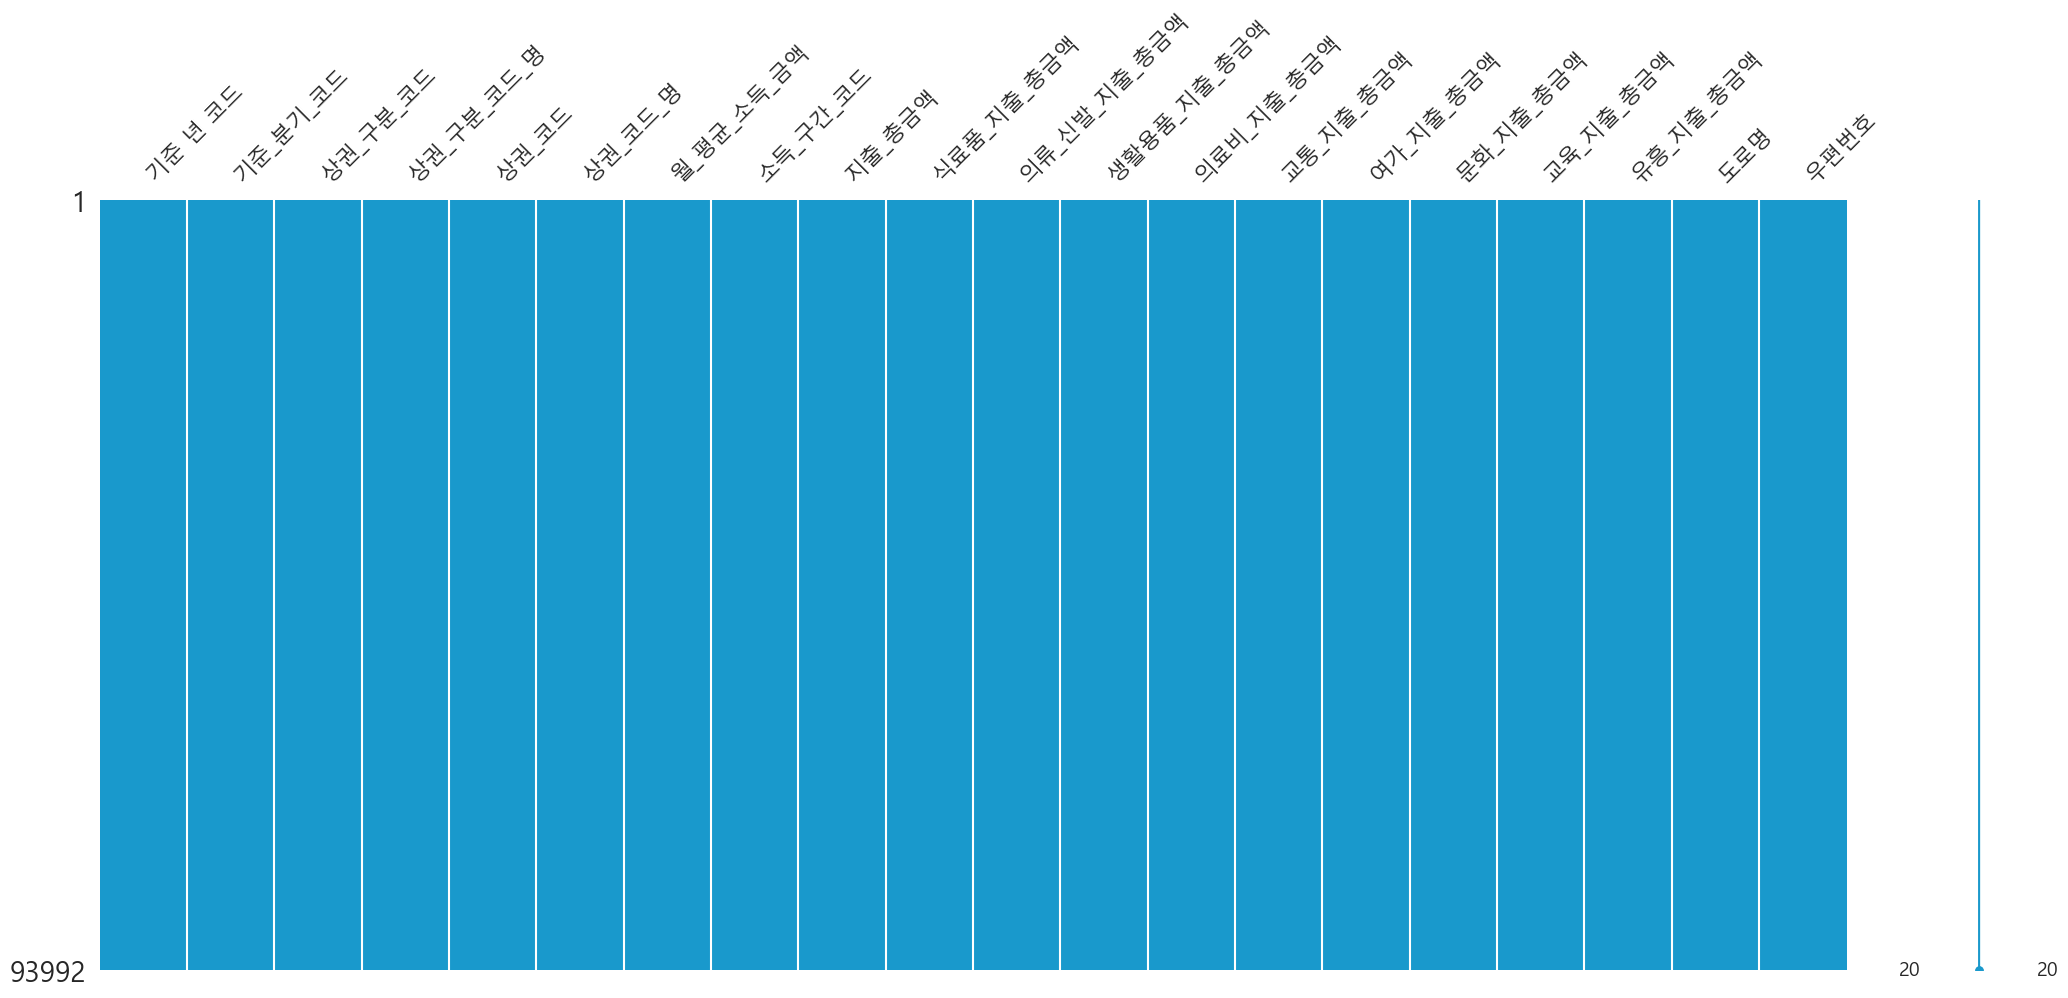

In [255]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.matplotlib_fname()

msno.matrix(df=maul_data_postno.iloc[:, :], color=(0.1, 0.6, 0.8))
plt.show()

In [51]:
#import seaborn as sns
#sns.kdeplot(df_mean_test)

maul_data_postno

,기준 년 코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,도로명,우편번호
0,2021,1,A,골목상권,1000193,왕산로43길,2729716,6,7501923026,2151712515,888933146,553108402,1067767035,1166698759,261418507,233074790,865027157,314182715,왕산로43길,2488.0
1,2021,1,A,골목상권,1000193,왕산로43길,2729716,6,7501923026,2151712515,888933146,553108402,1067767035,1166698759,261418507,233074790,865027157,314182715,왕산로43길,2487.0
2,2021,2,A,골목상권,1000193,왕산로43길,2729716,6,7501923026,2151712515,888933146,553108402,1067767035,1166698759,261418507,233074790,865027157,314182715,왕산로43길,2488.0
3,2021,2,A,골목상권,1000193,왕산로43길,2729716,6,7501923026,2151712515,888933146,553108402,1067767035,1166698759,261418507,233074790,865027157,314182715,왕산로43길,2487.0
4,2021,3,A,골목상권,1000193,왕산로43길,2729716,6,7501923026,2151712515,888933146,553108402,1067767035,1166698759,261418507,233074790,865027157,314182715,왕산로43길,2488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93987,2014,3,A,골목상권,1000391,갈현로33길,3528272,7,8829912670,2422305909,1056401759,616989824,1205650464,1401341296,322118012,265964458,1172153693,366987255,갈현로33길,3320.0
93988,2014,3,A,골목상권,1000391,갈현로33길,3528272,7,8829912670,2422305909,1056401759,616989824,1205650464,1401341296,322118012,265964458,1172153693,366987255,갈현로33길,3319.0
93989,2014,4,A,골목상권,1000391,갈현로33길,3493637,7,8829912670,2422305909,1056401759,616989824,1205650464,1401341296,322118012,265964458,1172153693,366987255,갈현로33길,3321.0
93990,2014,4,A,골목상권,1000391,갈현로33길,3493637,7,8829912670,2422305909,1056401759,616989824,1205650464,1401341296,322118012,265964458,1172153693,366987255,갈현로33길,3320.0


In [52]:
starbucks_csv = pd.read_csv("./starbucks.csv")

In [53]:
starbucks_csv["address_abbr"] = starbucks_csv["address"].str.split()
starbucks_csv

,Unnamed: 0,address,lat,long,name,address_abbr
0,0,"광주광역시 광산구 장신로 134, 1~2층 (수완동)",35.190397,126.824804,광산수완,"[광주광역시, 광산구, 장신로, 134,, 1~2층, (수완동)]"
1,1,광주광역시 광산구 임방울대로 487 (수완동),35.203175,126.819065,광주수완DT,"[광주광역시, 광산구, 임방울대로, 487, (수완동)]"
2,2,광주광역시 광산구 장신로 85 (장덕동),35.191469,126.819259,광주장덕,"[광주광역시, 광산구, 장신로, 85, (장덕동)]"
3,3,광주광역시 광산구 첨단중앙로 104 (월계동),35.214806,126.843227,광주첨단,"[광주광역시, 광산구, 첨단중앙로, 104, (월계동)]"
4,4,광주광역시 광산구 목련로 335 (신가동),35.179047,126.830126,광주신가DT,"[광주광역시, 광산구, 목련로, 335, (신가동)]"
...,...,...,...,...,...,...
1750,1750,세종특별자치시 도움8로 81 (어진동),36.504565,127.270769,세종청사,"[세종특별자치시, 도움8로, 81, (어진동)]"
1751,1751,"세종특별자치시 아름서1길 13-9 (아름동) 103,104,105,202,203호",36.511880,127.242770,세종아름,"[세종특별자치시, 아름서1길, 13-9, (아름동), 103,104,105,202,..."
1752,1752,세종특별자치시 노을3로 101 (한솔동),36.479955,127.253348,세종한솔,"[세종특별자치시, 노을3로, 101, (한솔동)]"
1753,1753,"세종특별자치시 소담3로 8 (소담동) 1동 12호,13호,14호,15호,15a호,16호",36.485755,127.300509,세종소담,"[세종특별자치시, 소담3로, 8, (소담동), 1동, 12호,13호,14호,15호,..."


In [256]:
starbucks_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1755 non-null   int64  
 1   address       1755 non-null   object 
 2   lat           1755 non-null   float64
 3   long          1755 non-null   float64
 4   name          1755 non-null   object 
 5   address_abbr  1755 non-null   object 
 6   addr          1755 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 96.1+ KB


### 스타벅스 매장위치정보기반 데이터 추출

스타벅스 매장의 위치정보와 도로명만 추출하여 서울시 마을상권분석 정보와 매핑을 준비

In [58]:
starbucks_csv["addr"] = pd.DataFrame(s1[2] for s1 in starbucks_csv["address_abbr"])
starbucks_byroad = starbucks_csv.groupby(["addr"])["addr"].count()
starbucks_byroad
#seoul_starbucks =  pd.merge( seoul_all_stats5, starbucks_cnt, left_on="", right_on="")

addr
101       1
105-10    1
1100로     1
13-9      1
169       1
         ..
효행로       4
후석로       2
휘경로       1
흑석로       1
흥덕구       8
Name: addr, Length: 908, dtype: int64

In [61]:
# 서울시 도로명 별 카페수와 스타벅스 도로명별 수에 대한 병합 수행
seoul_starbucks = pd.merge( left=starbucks_byroad, right=post_no, how="inner", left_index=True, right_on="도로명" )
seoul_starbucks = seoul_starbucks.groupby("도로명").max("우편번호")
seoul_starbucks
#seoul_starbucks.rename(columns={'상호명':'cafe_cnt'})

,addr,우편번호
도로명,,
가로수길,1,6035.0
가마산로,1,8501.0
가산디지털1로,4,8594.0
가재울미래로,1,3791.0
강남대로,14,6779.0
...,...,...
회기로,1,2796.0
회나무로,1,4346.0
효령로,1,6729.0



#### 서울 마을상권분석 데이터와 서울시 도로명별 카페수, 스타벅스 매장수 데이터 프레임을 병합

In [272]:
maul_data_mean = pd.DataFrame(maul_data_mean)
maul_data_cafe_sbuck = pd.merge(left=maul_data_mean, right=seoul_starbucks,  how="inner", left_index=True, right_on="우편번호")

maul_data_cafe_sbuck.rename(columns={'상호명':'cafe_cnt'}, inplace=True)
maul_data_cafe_sbuck.rename(columns={'addr':'sbucks_cnt'}, inplace=True)
maul_data_cafe_sbuck.drop(columns=["기준 년 코드", "기준_분기_코드", "상권_코드", "유흥_지출_총금액","소득_구간_코드"], inplace=True)
maul_data_cafe_sbuck

,월_평균_소득_금액,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,sbucks_cnt,우편번호
도로명,,,,,,,,,,,,
석계로,3.314988e+06,5.766112e+09,1.615193e+09,6.921192e+08,4.067908e+08,7.979917e+08,9.092415e+08,2.063256e+08,1.771616e+08,7.196102e+08,1,1902.0
망우로30길,2.749319e+06,6.713711e+09,1.864981e+09,7.987512e+08,4.998618e+08,9.370462e+08,1.067591e+09,2.570948e+08,2.060744e+08,8.106406e+08,1,2126.0
상봉로,2.548517e+06,1.222218e+10,3.438171e+09,1.458218e+09,8.996184e+08,1.681191e+09,1.922910e+09,4.260206e+08,3.879886e+08,1.493098e+09,1,2207.0
휘경로,3.405871e+06,5.653734e+09,1.536500e+09,7.252593e+08,4.066659e+08,7.578945e+08,7.737360e+08,1.936741e+08,2.088620e+08,7.772437e+08,1,2441.0
경희대로,3.726398e+06,3.772769e+09,9.081034e+08,5.144052e+08,2.527818e+08,4.611664e+08,4.797759e+08,1.354584e+08,1.484091e+08,6.735208e+08,1,2454.0
...,...,...,...,...,...,...,...,...,...,...,...,...
두산로,2.752675e+06,4.509494e+09,1.139422e+09,5.612388e+08,3.507451e+08,5.495338e+08,7.446013e+08,1.917944e+08,1.421418e+08,6.391121e+08,1,8584.0
시흥대로73길,3.113307e+06,4.140635e+09,1.110574e+09,4.939936e+08,2.957964e+08,5.447255e+08,6.626671e+08,1.551107e+08,1.237615e+08,5.845094e+08,1,8613.0
시흥대로,2.825054e+06,1.001791e+10,2.640632e+09,1.247618e+09,7.917939e+08,1.244991e+09,1.645564e+09,4.108353e+08,3.278079e+08,1.275330e+09,2,8769.0


In [325]:
maul_data_cafe_sbuck_1 = maul_data_cafe_sbuck.groupby("도로명").mean().sort_values("sbucks_cnt", ascending=False).head(100)
maul_data_cafe_sbuck_1["소득금액_백만"] = (maul_data_cafe_sbuck_1["월_평균_소득_금액"]/1000000).__round__(1)
maul_data_cafe_sbuck_1["엥겔계수"] = (maul_data_cafe_sbuck_1["식료품_지출_총금액"]/maul_data_cafe_sbuck_1["지출_총금액"]).__round__(3)
maul_data_cafe_sbuck_1

,월_평균_소득_금액,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,sbucks_cnt,우편번호,소득금액_백만,엥겔계수
도로명,,,,,,,,,,,,,,
남부순환로,3.682116e+06,7.018102e+09,1.790028e+09,8.897152e+08,5.698703e+08,8.572673e+08,1.189860e+09,2.935449e+08,2.305544e+08,8.840750e+08,16.0,8806.0,3.7,0.255
강남대로,3.438791e+06,5.483861e+09,1.304062e+09,6.788162e+08,4.153329e+08,6.358687e+08,9.535190e+08,2.299774e+08,1.629675e+08,8.725058e+08,14.0,6779.0,3.4,0.238
중앙로,3.723177e+06,5.434972e+09,1.461729e+09,6.391488e+08,3.703544e+08,7.076427e+08,8.574794e+08,1.956019e+08,1.598178e+08,8.244329e+08,10.0,8241.0,3.7,0.269
논현로,3.444947e+06,8.239560e+09,1.895569e+09,1.023727e+09,6.162067e+08,9.431376e+08,1.465703e+09,3.513886e+08,2.367242e+08,1.359654e+09,9.0,6791.0,3.4,0.230
능동로,4.514741e+06,8.067674e+09,2.017552e+09,9.857098e+08,5.834093e+08,9.961356e+08,1.374421e+09,3.062944e+08,2.351976e+08,1.221154e+09,8.0,5096.0,4.5,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
상봉로,2.548517e+06,1.222218e+10,3.438171e+09,1.458218e+09,8.996184e+08,1.681191e+09,1.922910e+09,4.260206e+08,3.879886e+08,1.493098e+09,1.0,2207.0,2.5,0.281
서래로,5.464568e+06,5.997450e+09,1.327961e+09,7.630949e+08,4.536295e+08,6.921549e+08,1.092051e+09,2.903252e+08,1.645471e+08,9.625435e+08,1.0,6581.0,5.5,0.221
석계로,3.314988e+06,5.766112e+09,1.615193e+09,6.921192e+08,4.067908e+08,7.979917e+08,9.092415e+08,2.063256e+08,1.771616e+08,7.196102e+08,1.0,1902.0,3.3,0.280


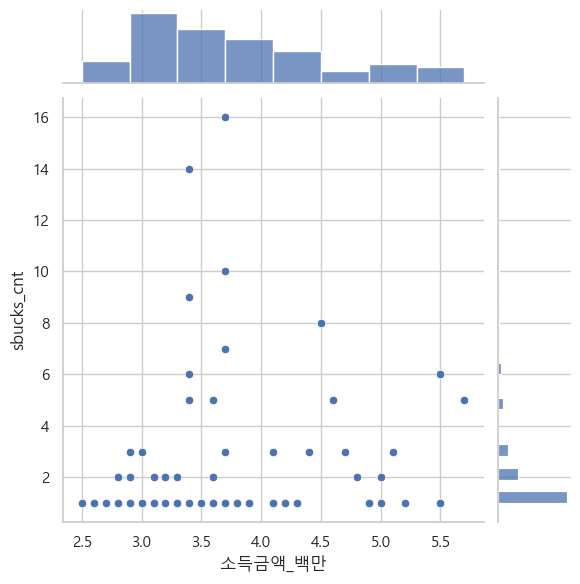

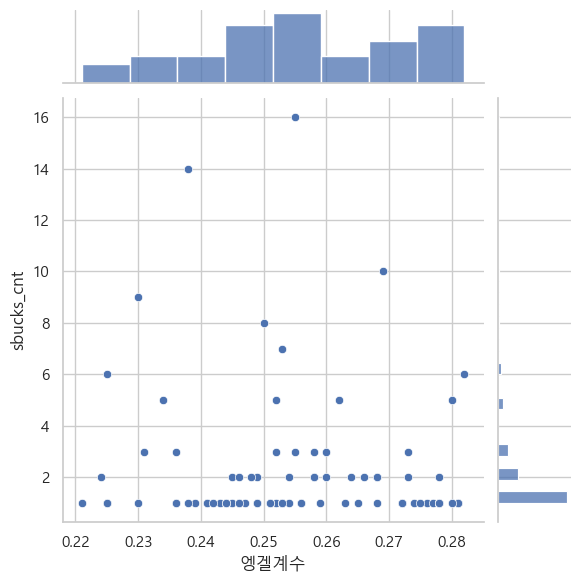

In [323]:
#sns.kdeplot(data=maul_data_cafe_sbuck_1, x='소득금액_백만')
#sns.kdeplot(data=maul_data_cafe_sbuck_1, x='sbucks_cnt')
#sns.histplot(data=maul_data_cafe_sbuck_1, x='소득금액_백만', bins=16, kde=True)
#sns.histplot(data=maul_data_cafe_sbuck_1, x='sbucks_cnt', bins=16, kde=True)
sns.jointplot(x='소득금액_백만', y='sbucks_cnt', data=maul_data_cafe_sbuck_1)
sns.jointplot(x='엥겔계수', y='sbucks_cnt', data=maul_data_cafe_sbuck_1)
plt.show()